# American Airline Reviews Sentiment + Emotions Analysis

---

## Web Scraping 

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax and Trustpilot

If you visit [https://www.airlinequality.com], [https://www.trustpilot.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to American and the Airline itself.

If you navigate to this links: [https://www.airlinequality.com/airline-reviews/american-airlines/], [https://www.trustpilot.com/review/www.aa.com] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.


In [2]:
# import needed packages
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [3]:
#---------------------- skytrax section --------------------------------

base_url = "https://www.airlinequality.com/airline-reviews/american-airlines"
pages = 53            # number of pages 
page_size = 100      

reviews = []        # 100*22 = 2200 review  

# for i in range(1, pages + 1) to iterate over the pages
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f" Skytrax ---> {len(reviews)} total reviews")

print(f"------------------------Scraping for Skytrax Finished ---> {len(reviews)} total reviews------------------------------")


Scraping page 1
 Skytrax ---> 100 total reviews
Scraping page 2
 Skytrax ---> 200 total reviews
Scraping page 3
 Skytrax ---> 300 total reviews
Scraping page 4
 Skytrax ---> 400 total reviews
Scraping page 5
 Skytrax ---> 500 total reviews
Scraping page 6
 Skytrax ---> 600 total reviews
Scraping page 7
 Skytrax ---> 700 total reviews
Scraping page 8
 Skytrax ---> 800 total reviews
Scraping page 9
 Skytrax ---> 900 total reviews
Scraping page 10
 Skytrax ---> 1000 total reviews
Scraping page 11
 Skytrax ---> 1100 total reviews
Scraping page 12
 Skytrax ---> 1200 total reviews
Scraping page 13
 Skytrax ---> 1300 total reviews
Scraping page 14
 Skytrax ---> 1400 total reviews
Scraping page 15
 Skytrax ---> 1500 total reviews
Scraping page 16
 Skytrax ---> 1600 total reviews
Scraping page 17
 Skytrax ---> 1700 total reviews
Scraping page 18
 Skytrax ---> 1800 total reviews
Scraping page 19
 Skytrax ---> 1900 total reviews
Scraping page 20
 Skytrax ---> 2000 total reviews
Scraping page 21
 

In [4]:
pages = 61  # number of pages 
pilot_reviews = []

# for i in range(1, pages + 1) to iterate over the pages
for i in range(1, pages + 1):
    
    # Create URL to collect links from paginated data
    url = f"https://www.trustpilot.com/review/www.aa.com?page={i}&sort=recency"

    print(f"Scraping page {i}")

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("p", {"class": "typography_body-l__KUYFJ typography_appearance-default__AAY17 typography_color-black__5LYEn"}):
        pilot_reviews.append(para.get_text())
    

    print(f"TrustPilot---> {len(pilot_reviews)} total reviews")

          

Scraping page 1
TrustPilot---> 20 total reviews
Scraping page 2
TrustPilot---> 40 total reviews
Scraping page 3
TrustPilot---> 60 total reviews
Scraping page 4
TrustPilot---> 80 total reviews
Scraping page 5
TrustPilot---> 100 total reviews
Scraping page 6
TrustPilot---> 120 total reviews
Scraping page 7
TrustPilot---> 140 total reviews
Scraping page 8
TrustPilot---> 160 total reviews
Scraping page 9
TrustPilot---> 180 total reviews
Scraping page 10
TrustPilot---> 200 total reviews
Scraping page 11
TrustPilot---> 220 total reviews
Scraping page 12
TrustPilot---> 239 total reviews
Scraping page 13
TrustPilot---> 259 total reviews
Scraping page 14
TrustPilot---> 279 total reviews
Scraping page 15
TrustPilot---> 299 total reviews
Scraping page 16
TrustPilot---> 319 total reviews
Scraping page 17
TrustPilot---> 339 total reviews
Scraping page 18
TrustPilot---> 359 total reviews
Scraping page 19
TrustPilot---> 379 total reviews
Scraping page 20
TrustPilot---> 399 total reviews
Scraping page

## Turn extracted data into csv files


In [5]:
df_st = pd.DataFrame()
df_st["reviews"] = reviews
df_st.to_csv("American_reviews_skytrax.csv")

df_tp = pd.DataFrame()
df_tp["reviews"] = pilot_reviews
df_tp.to_csv("American_reviews_trustpilot.csv")

## Read and load csv file

In [6]:
#read the csv file for American reviews from skyrax and take a look 
df_st = pd.read_csv("American_reviews_skytrax.csv", index_col= 0)
df_st.head()


,reviews
0,✅ Trip Verified | Don’t fly American Airlines ...
1,Not Verified | Halfway through the first leg ...
2,Not Verified | We were delayed at security an...
3,✅ Trip Verified | I paid over $200 for Main c...
4,Not Verified | Took the available seats next ...


In [7]:
#read the csv file for American reviews from trustpilot and take a look 
df_tp = pd.read_csv("American_reviews_trustpilot.csv", index_col= 0)
df_tp.head()

,reviews
0,I bought first class tix from Tampa to Provide...
1,"We booked our vacation through Sandals, includ..."
2,They were sending me to the wrong city. It was...
3,I paid over $200 for Main cabin plus because I...
4,I wish that it was possible to rate American A...


##  Now let's clean the text data  
#### plus u have to make sure there are:
1. No useless text data.
2. No Uppercase letters (turn all letters to lowercase).
3. No Punctuations.
4. Tokenization and stop words handling.

In [8]:
import string   # we need it for Punctuations removal
from stop_words import get_stop_words   # or we can use from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize # it turn text to list but more faster 

def sentiment_clean_text(text):
    '''
    this function take text and clean it  

    Parameters
    ----------
    text : string 

    Returns
    -------
    text_list : string after cleaning.

    '''


    # A. first step remove useless text data (if there are any) note: i don't need data before | so I will remove it 
    if '|' in text:
        text =  text.split('|')[1]   
       
    # B. second turn letters into lowercase 
    text = text.lower()
        
    # C. third remove all Punctuations.
    text = text.translate(str.maketrans('','',string.punctuation))
    
    return text

def emotion_clean_text(text):
    '''
    this function take text and clean it then turn it to list of words 

    Parameters
    ----------
    text : string 

    Returns
    -------
    text_list : list of text words after cleaning.

    '''
        
    # D. forth step Tokenization and stop words 
        
    # Tokenizaiton: turning string into list of words.
    # Stop words: words without meaning for sentiment analysis.

        
    # Tokenizaiton
    text = word_tokenize(text,"english")
    
    # handeling the stop words but what are the stop words 
    stop_words = get_stop_words('english') #or we can use stop_words = stopwords.words('english')

    # Removing stop words from the tokenized words list
    text_list = []
    
    for word in text:
        if word not in stop_words:
            text_list.append(word)

       
    # return the list of words
    return text_list


## Emotion text dectionary 

In [9]:
def emotion_maping (file,di): 
    
    for line in file:
        clear_line = line.replace("\n", '').replace(",", '').replace("'", '').strip()
        word, emotion = clear_line.split(':')
        di[word] = emotion
            
    return di

## Now we have clean data let's Do sentiment analysis 

In [10]:
# let's import the needed packages 
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# function to carry out the     
def sentiment_analyze(text):
    
    scores = SentimentIntensityAnalyzer().polarity_scores(text) # return dictionary of scores
    
    if (scores['neg'] > scores['pos']):
        return 0
    
    else:
        return 1


## Main 

In [12]:
from collections import Counter

# define needed data structures
cleaned_text = ""
temp_emotion_list = []
score = 0
emotion_dict = {}
words_score_dict = {}
moods_list_st = []
moods_list_tp = []

# get the emotion dictionary ready
emotion_file = open('D:/Forage/American/DataSets/emotions.txt','r',encoding='utf-8') 
emotion_dict = emotion_maping(emotion_file,emotion_dict)
emotion_file.close()

# ------------------------ loop for the skytrx Dataframe ------------------------------

# loop for all reviews in Skytrax dataFrame  
for i in range(len(df_st)):
    
    # get the review of index i
    text = str(df_st['reviews'][i])
    
    # step 1: let's clean the text and assign cleaned list to dataFrame 
    # simple clean 
    cleaned_text= sentiment_clean_text(text)
    
    #Step 2: sentiment Analysis
    score = sentiment_analyze(cleaned_text)
    moods_list_st.append(score)

    
    # Step 3: advanced clean for emotions
    cleaned_text_list = emotion_clean_text(cleaned_text)
    df_st['reviews'][i] = cleaned_text_list
    

    # Step 4: emotion list builder
    for word in emotion_dict.keys():
        if word in cleaned_text_list:
            temp_emotion_list.append(emotion_dict[word])    

# now let's create new column for moods for skytrax
df_st['mood'] = moods_list_st


# ------------------------ loop for the trustpilot Dataframe ------------------------------

# loop for all reviews in trustpilot dataFrame  
for i in range(len(df_tp)):
    
    # get the review of index i
    text = str(df_tp['reviews'][i])
    
    # step 1: let's clean the text and assign cleaned list to dataFrame 
    # simple clean 
    cleaned_text= sentiment_clean_text(text)
    
    #Step 2: sentiment Analysis
    score = sentiment_analyze(cleaned_text)
    moods_list_tp.append(score)

    
    # Step 3: advanced clean for emotions
    cleaned_text_list = emotion_clean_text(cleaned_text)
    df_tp['reviews'][i] = cleaned_text_list
    

    # Step 4: emotion list builder
    for word in emotion_dict.keys():
        if word in cleaned_text_list:
            temp_emotion_list.append(emotion_dict[word])  


# now let's create new column for moods trust pilot dataframe
df_tp['mood'] = moods_list_tp


## Plot  findings

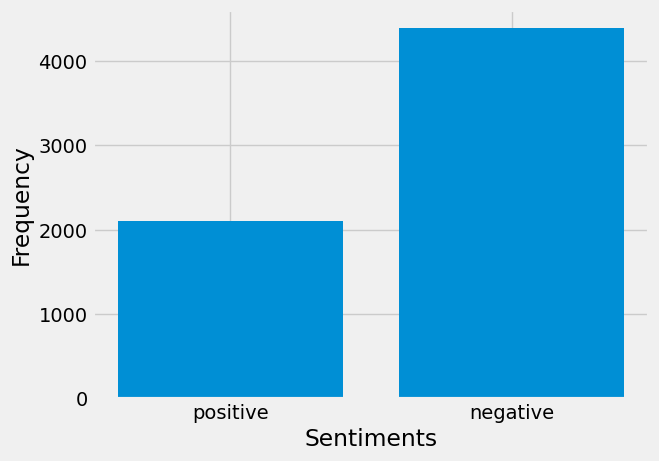

In [15]:
#____________________________ Plot for sentiment Vader scores ____________________________________


# Step 5: plot sentiment and emotions 
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


# get summary dictionary for sentiment 
moods_list_all = moods_list_st + moods_list_tp
mmod_summary = dict(Counter(moods_list_all))

# rename dictionary keys before ploting 
mmod_summary['positive'] = mmod_summary.pop(1)
mmod_summary['negative'] = mmod_summary.pop(0)

fig, ax = plt.subplots()
ax.bar(mmod_summary.keys(), mmod_summary.values())

# label the plot 
plt.xlabel('Sentiments')
plt.ylabel('Frequency')
plt.savefig('Sentiments.png')
plt.show()



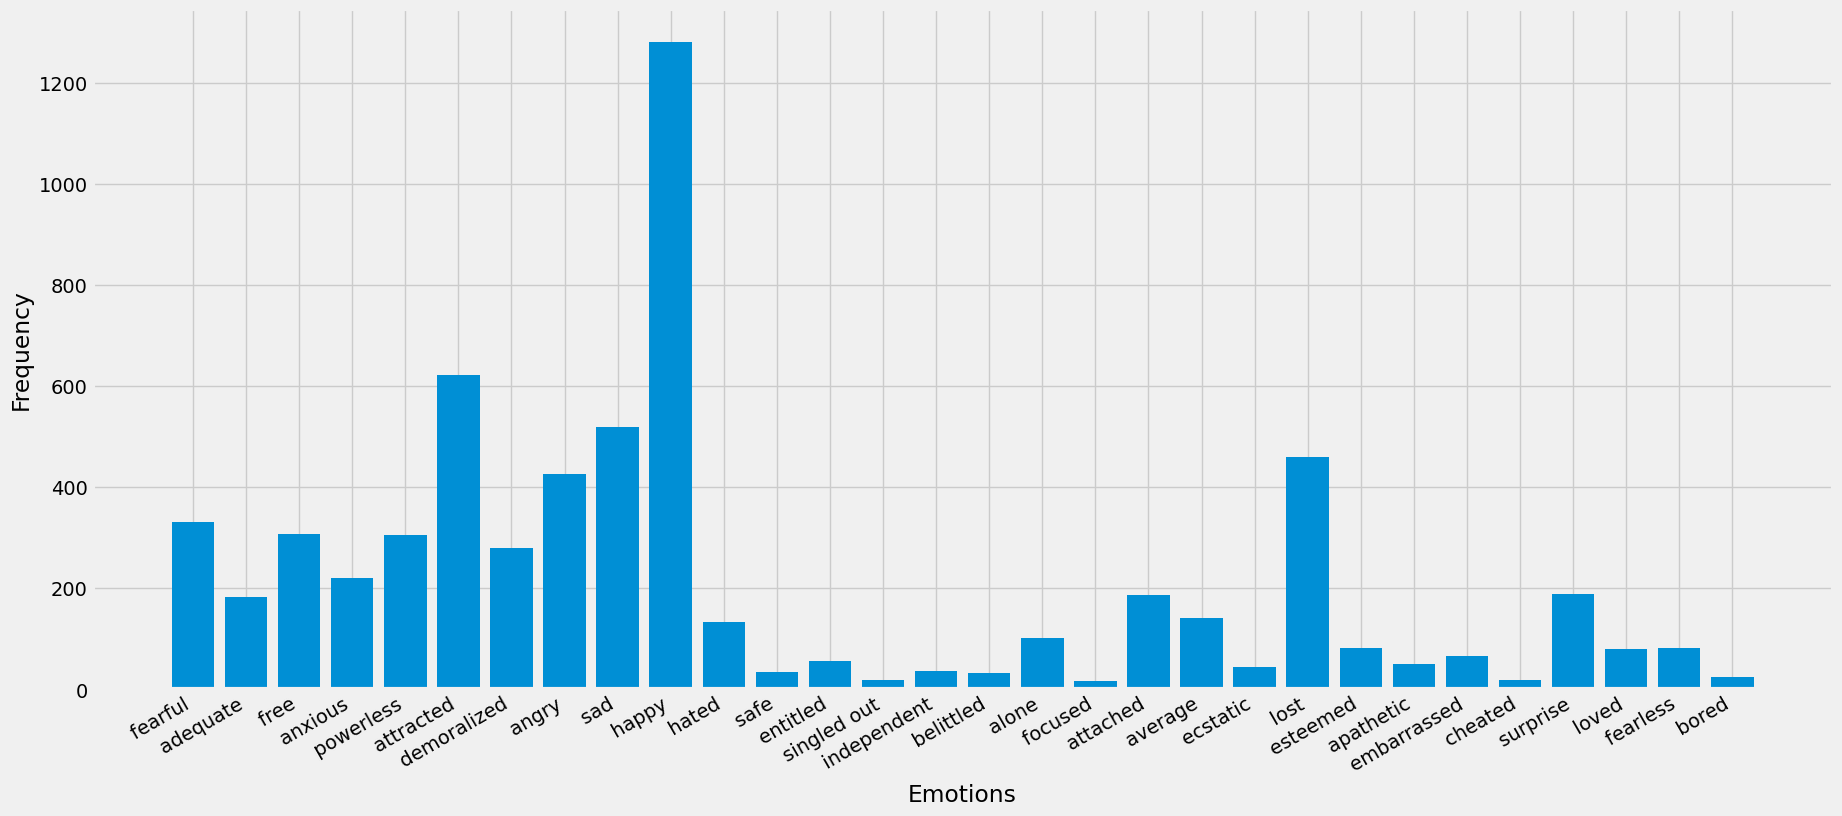

In [14]:
#____________________________ Plot for emotions ____________________________________

# turn the emotion list into dictionary 
words_score_dict = dict(Counter(temp_emotion_list))

# now let's go more Specifically and just choose emotions with freq more than 10
more_than_15_emotions = dict( (key, value) for (key, value) in words_score_dict.items() if value > 15 )


fig, ax = plt.subplots()
#ax.bar(words_score_dict.keys(), words_score_dict.values())
ax.bar(more_than_15_emotions.keys(), more_than_15_emotions.values())

# the fit the text undre graph 
fig.autofmt_xdate()

# change the width and length of plot 
fig.set_figwidth(20)
fig.set_figheight(10)

# label the plot 
plt.xlabel('Emotions')
plt.ylabel('Frequency')

#save the graph and show it 
plt.savefig('More_than_15_emotions.png')
plt.show()




## The End, hope u enjoyed 😊❤️